In [26]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
data = pd.read_csv("D:/python odyssey/Day7/Naive Bayes/continuos/credit_data.csv")


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
clientid    2000 non-null int64
income      2000 non-null float64
age         2000 non-null float64
loan        2000 non-null float64
LTI         2000 non-null float64
default     2000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


In [30]:
data.head()


,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [31]:
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64

In [32]:
data.describe()

,clientid,income,age,loan,LTI,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,577.494589,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.047903,0.000000
50%,1000.500000,45789.117313,41.382673,3974.719419,0.099437,0.000000
75%,1500.250000,57791.281668,52.596993,6432.410625,0.147585,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,0.199938,1.000000


In [8]:
data.groupby('default').describe()

clientid                                                               \
           count         mean         std  min    25%     50%     75%     max   
default                                                                         
0         1717.0  1005.221899  577.425092  1.0  510.0  1010.0  1503.0  2000.0   
1          283.0   971.851590  578.110402  5.0  458.5   976.0  1470.0  1998.0   

         income                ...         loan                   LTI  \
          count          mean  ...          75%           max   count   
default                        ...                                      
0        1717.0  45318.317216  ...  5757.848995  13766.051239  1717.0   
1         283.0  45412.188607  ...  9037.108180  13376.797706   283.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
default                                                                        
0        0.088270  0.055253  0.000049  0.040941  0.084885  0.127454  0.199292  
1        0.159879  0.023243  0.120139  0.139297  0.160218  0.179479  0.199938  

[2 rows x 40 columns]

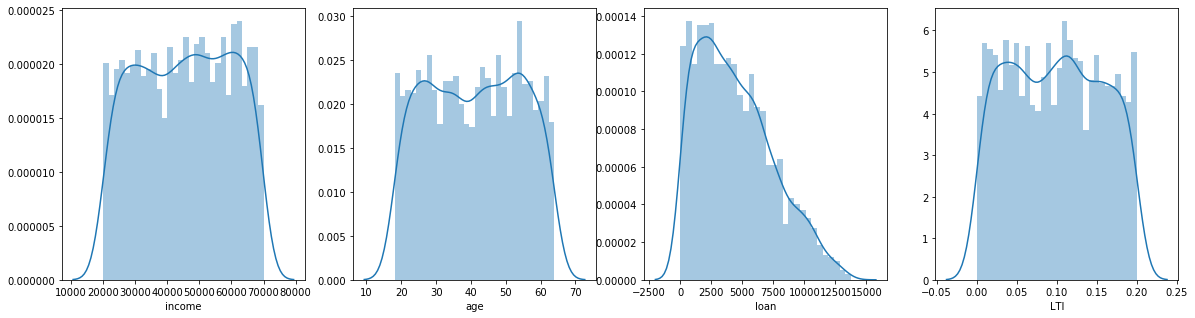

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
ax=sns.distplot(data["income"],bins=30,ax=axes[0])
ax=sns.distplot(data["age"],bins=30,ax=axes[1])
ax=sns.distplot(data["loan"],bins=30,ax=axes[2])
ax=sns.distplot(data["LTI"],bins=30,ax=axes[3]

In [33]:
X = data[["income", "age", "loan"]]
Y = data.default

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)


In [35]:
model = GaussianNB()
mn_model = model.fit(X_train,y_train)
y_pred=mn_model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test, y_pred)

0.9216666666666666

In [37]:
confusion_matrix(y_test, y_pred)


array([[499,   9],
       [ 38,  54]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       508
           1       0.86      0.59      0.70        92

    accuracy                           0.92       600
   macro avg       0.89      0.78      0.83       600
weighted avg       0.92      0.92      0.92       600

